# 🍕 Pizza Place Sales Analysis
*A data exploration of one year of pizza sales*

---

## 📋 Overview
This notebook analyzes one year of pizza sales from a fictitious pizza place.  
We’ll explore revenue trends, bestsellers, sales by day and month, and more.

### 📂 Datasets:
- `orders.csv` – order ID, date, and time  
- `order_details.csv` – line items with order IDs, pizza IDs, and quantities  
- `pizzas.csv` – pizza IDs, types, sizes, and prices  
- `pizza_types.csv` – pizza names, categories, and ingredients  
- `data_dictionary.csv` – description of each dataset


## 🔧 Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.float_format', lambda x: '%.2f' % x)
plt.style.use('seaborn-v0_8')

Matplotlib is building the font cache; this may take a moment.


## 📂 Step 2: Load the Data

In [ ]:

orders = pd.read_csv("Pizza+Place+Sales\pizza_sales\orders.csv", encoding='latin1')
order_details = pd.read_csv("Pizza+Place+Sales\pizza_sales\order_details.csv", encoding='latin1')
pizzas = pd.read_csv("Pizza+Place+Sales\pizza_sales\pizzas.csv", encoding='latin1')
pizza_types = pd.read_csv("Pizza+Place+Sales\pizza_sales\pizza_types.csv", encoding='latin1')

# Preview
orders.head(), order_details.head(), pizzas.head(), pizza_types.head()

(   order_id        date      time
 0         1  2015-01-01  11:38:36
 1         2  2015-01-01  11:57:40
 2         3  2015-01-01  12:12:28
 3         4  2015-01-01  12:16:31
 4         5  2015-01-01  12:21:30,
    order_details_id  order_id       pizza_id  quantity
 0                 1         1     hawaiian_m         1
 1                 2         2  classic_dlx_m         1
 2                 3         2  five_cheese_l         1
 3                 4         2    ital_supr_l         1
 4                 5         2     mexicana_m         1,
      pizza_id pizza_type_id size  price
 0   bbq_ckn_s       bbq_ckn    S  12.75
 1   bbq_ckn_m       bbq_ckn    M  16.75
 2   bbq_ckn_l       bbq_ckn    L  20.75
 3  cali_ckn_s      cali_ckn    S  12.75
 4  cali_ckn_m      cali_ckn    M  16.75,
   pizza_type_id                          name category  \
 0       bbq_ckn    The Barbecue Chicken Pizza  Chicken   
 1      cali_ckn  The California Chicken Pizza  Chicken   
 2   ckn_alfredo     The Chi

## 🔗 Step 3: Merge Datasets

In [5]:
# Join order_details with pizzas
order_pizza = pd.merge(order_details, pizzas, on="pizza_id")

# Join with orders to get date/time
full_data = pd.merge(order_pizza, orders, on="order_id")

# Join with pizza_types to get category and name
full_data = pd.merge(full_data, pizza_types, on="pizza_type_id")

full_data.head()

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,date,time,name,category,ingredients
0,1,1,hawaiian_m,1,hawaiian,M,13.25,2015-01-01,11:38:36,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00,2015-01-01,11:57:40,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,3,2,five_cheese_l,1,five_cheese,L,18.50,2015-01-01,11:57:40,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,4,2,ital_supr_l,1,ital_supr,L,20.75,2015-01-01,11:57:40,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,5,2,mexicana_m,1,mexicana,M,16.00,2015-01-01,11:57:40,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


## 📊 Step 4: Clean and Prepare Data

In [6]:
# Convert date/time
full_data['date'] = pd.to_datetime(full_data['date'])
full_data['month'] = full_data['date'].dt.month_name()
full_data['day'] = full_data['date'].dt.day_name()
full_data['hour'] = pd.to_datetime(full_data['time'], format='%H:%M:%S').dt.hour

# Compute line revenue
full_data['line_total'] = full_data['price'] * full_data['quantity']

full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_details_id  48620 non-null  int64         
 1   order_id          48620 non-null  int64         
 2   pizza_id          48620 non-null  object        
 3   quantity          48620 non-null  int64         
 4   pizza_type_id     48620 non-null  object        
 5   size              48620 non-null  object        
 6   price             48620 non-null  float64       
 7   date              48620 non-null  datetime64[ns]
 8   time              48620 non-null  object        
 9   name              48620 non-null  object        
 10  category          48620 non-null  object        
 11  ingredients       48620 non-null  object        
 12  month             48620 non-null  object        
 13  day               48620 non-null  object        
 14  hour              4862

## 💰 Step 5: Total Revenue

In [7]:
total_revenue = full_data['line_total'].sum()
print("Total Revenue: $", round(total_revenue, 2))

Total Revenue: $ 817860.05


## 📦 Step 6: Total Quantity Sold

In [8]:
total_quantity = full_data['quantity'].sum()
print("Total Pizzas Sold:", total_quantity)

Total Pizzas Sold: 49574


## 🧾 Step 7: Total Orders

In [9]:
total_orders = orders['order_id'].nunique()
print("Total Orders:", total_orders)

Total Orders: 21350


## 🍕 Step 8: Number of Pizza Types Sold

In [10]:
pizza_types_sold = pizza_types['pizza_type_id'].nunique()
print("Number of Pizza Types:", pizza_types_sold)

Number of Pizza Types: 32


## 💲 Step 9: Average Price of Pizzas

In [11]:
avg_price = pizzas['price'].mean()
print("Average Pizza Price: $", round(avg_price, 2))

Average Pizza Price: $ 16.44


## 🕒 Step 10: Peak Hours of Sales

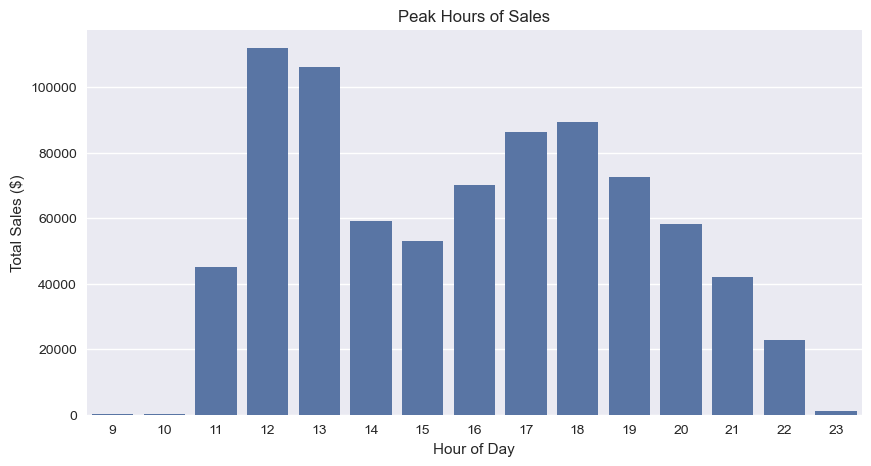

In [12]:
hourly_sales = full_data.groupby('hour')['line_total'].sum()
plt.figure(figsize=(10,5))
sns.barplot(x=hourly_sales.index, y=hourly_sales.values)
plt.title('Peak Hours of Sales')
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales ($)')
plt.show()

## 📅 Step 11: Sales by Day of the Week

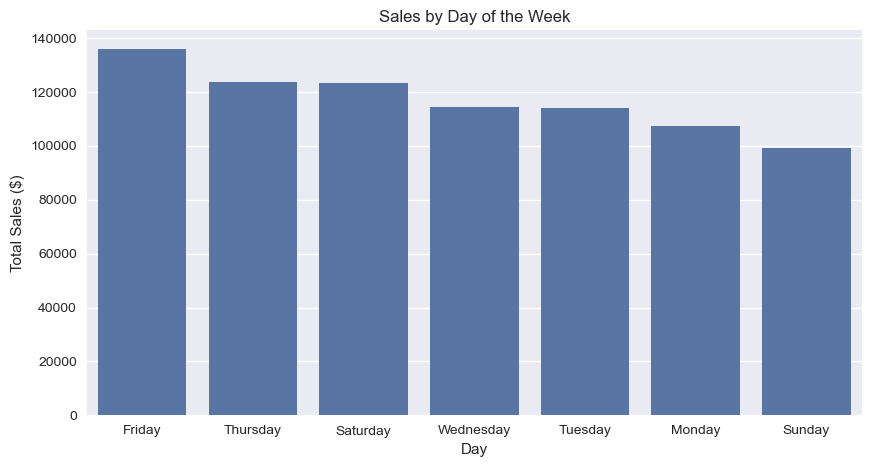

Friday has the most sales with a total of $136,073.90


In [25]:
day_sales = full_data.groupby('day')['line_total'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=day_sales.index, y=day_sales.values)
plt.title('Sales by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Total Sales ($)')
plt.show()
# Identify the day with the highest sales
day_sales
top_day = day_sales.idxmax()
top_day_value = day_sales.max()
print(f"{top_day} has the most sales with a total of ${top_day_value:,.2f}")

## 🏆 Step 12: Top 5 Bestselling Pizzas

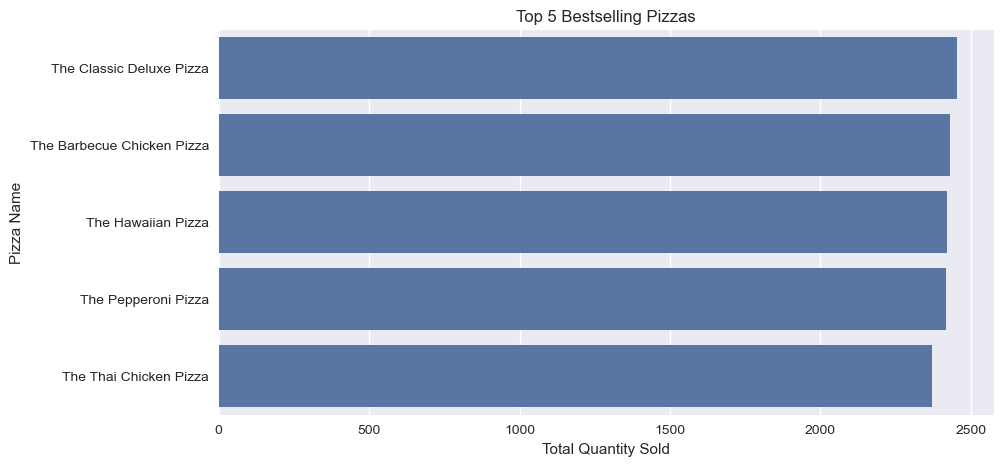

name
The Classic Deluxe Pizza      2453
The Barbecue Chicken Pizza    2432
The Hawaiian Pizza            2422
The Pepperoni Pizza           2418
The Thai Chicken Pizza        2371
Name: quantity, dtype: int64

In [26]:
bestsellers = full_data.groupby('name')['quantity'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(10,5))
sns.barplot(x=bestsellers.values, y=bestsellers.index)
plt.title('Top 5 Bestselling Pizzas')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Pizza Name')
plt.show()
bestsellers

## 📆 Step 13: Monthly Sales Trend

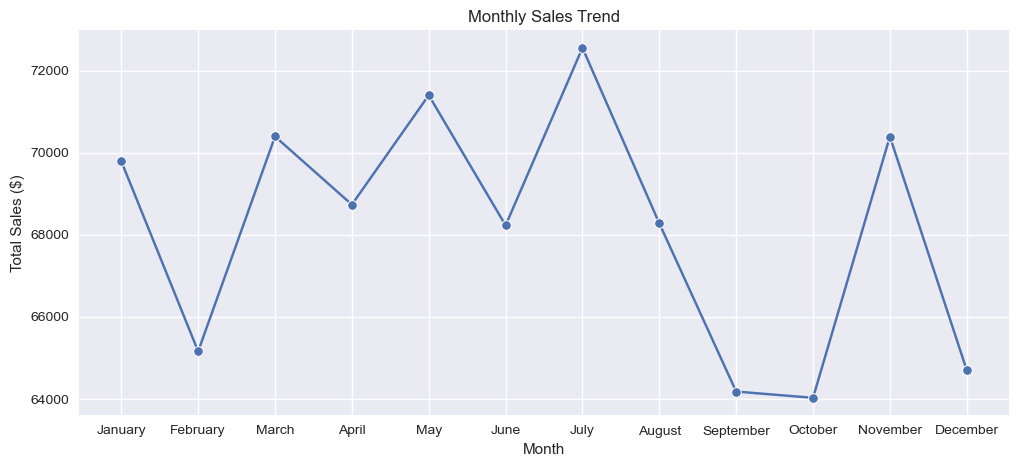

No Observable Trends in Monthly Sales Data


In [27]:
monthly_sales = full_data.groupby('month')['line_total'].sum().reindex([
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'
])

plt.figure(figsize=(12,5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.show()
monthly_sales

print('No Observable Trends in Monthly Sales Data')

## 📉 Step 14: Pizzas That Are Not Doing Well

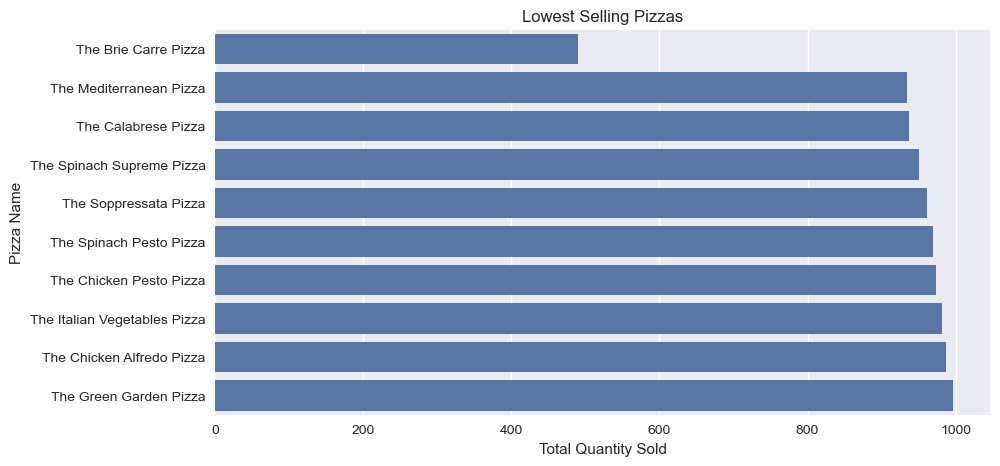

name
The Brie Carre Pizza            490
The Mediterranean Pizza         934
The Calabrese Pizza             937
The Spinach Supreme Pizza       950
The Soppressata Pizza           961
The Spinach Pesto Pizza         970
The Chicken Pesto Pizza         973
The Italian Vegetables Pizza    981
The Chicken Alfredo Pizza       987
The Green Garden Pizza          997
Name: quantity, dtype: int64

In [18]:
low_sellers = full_data.groupby('name')['quantity'].sum().sort_values().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=low_sellers.values, y=low_sellers.index)
plt.title('Lowest Selling Pizzas')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Pizza Name')
plt.show()
low_sellers

## 🎯 Step 15: Average Order Value

In [28]:
# Calculate total revenue per order
order_totals = full_data.groupby('order_id')['line_total'].sum()

# Calculate average order value
average_order_value = order_totals.mean()
print("Average Order Value: $", round(average_order_value, 2))

Average Order Value: $ 38.31


## 📊 Step 16: Sales by Category

category
Classic   220053.10
Supreme   208197.00
Chicken   195919.50
Veggie    193690.45
Name: line_total, dtype: float64


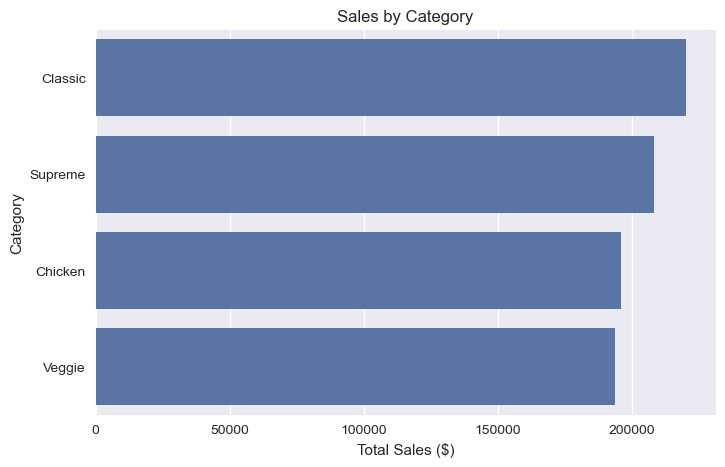

In [29]:
# Sales by category
category_sales = full_data.groupby('category')['line_total'].sum().sort_values(ascending=False)
print(category_sales)

plt.figure(figsize=(8,5))
sns.barplot(x=category_sales.values, y=category_sales.index)
plt.title('Sales by Category')
plt.xlabel('Total Sales ($)')
plt.ylabel('Category')
plt.show()

## 📊 Step 17: Impact of Size on Revenue

size
L     375318.70
M     249382.25
S     178076.50
XL     14076.00
XXL     1006.60
Name: line_total, dtype: float64


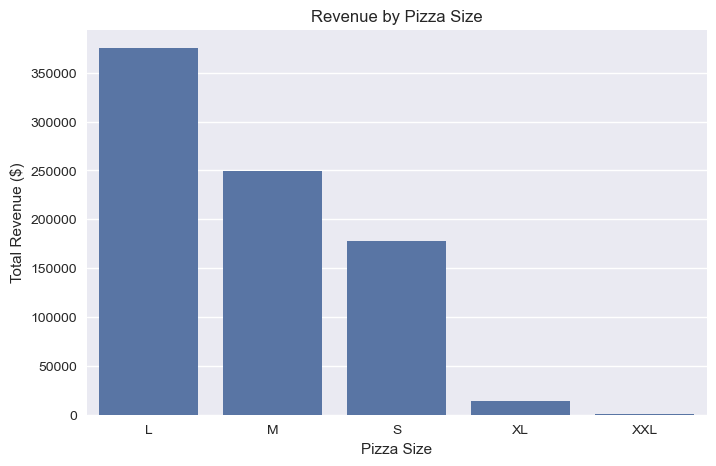

In [30]:
# Impact of size on revenue
size_sales = full_data.groupby('size')['line_total'].sum().sort_values(ascending=False)
print(size_sales)

plt.figure(figsize=(8,5))
sns.barplot(x=size_sales.index, y=size_sales.values)
plt.title('Revenue by Pizza Size')
plt.xlabel('Pizza Size')
plt.ylabel('Total Revenue ($)')
plt.show()